# Compare the correlations for same kOn_Target when rAdd is varying independently


In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import spearmanr
import re
from tqdm.notebook import tqdm

In [2]:
#Parameter sheet
parameter_sheet = pd.read_csv('/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_radd_negative.csv', index_col=0)
folder_simulations = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/A_to_B_neg_reg/"
list_simulations = [file for file in os.listdir(folder_simulations)  if "df_" in file]
len(list_simulations)

18

In [3]:
list_simulations

['df_row_24_25_11072025_192151_ncells_10000_A_to_B_inhibition_3065b39c.csv',
 'df_row_6_7_11072025_182826_ncells_10000_A_to_B_inhibition_2e604a45.csv',
 'df_row_8_9_11072025_183616_ncells_10000_A_to_B_inhibition_36cc2a80.csv',
 'df_row_30_31_11072025_201659_ncells_10000_A_to_B_inhibition_3cf3538c.csv',
 'df_row_34_35_11072025_203011_ncells_10000_A_to_B_inhibition_a1b91659.csv',
 'df_row_2_3_11072025_181226_ncells_10000_A_to_B_inhibition_d01eed83.csv',
 'df_row_10_11_11072025_184236_ncells_10000_A_to_B_inhibition_784ae0bc.csv',
 'df_row_16_17_11072025_190024_ncells_10000_A_to_B_inhibition_52ce4287.csv',
 'df_row_32_33_11072025_202337_ncells_10000_A_to_B_inhibition_a21a98cf.csv',
 'df_row_20_21_11072025_191110_ncells_10000_A_to_B_inhibition_5c3b45cb.csv',
 'df_row_14_15_11072025_185433_ncells_10000_A_to_B_inhibition_4a350555.csv',
 'df_row_0_1_11072025_180442_ncells_10000_A_to_B_inhibition_9b92b972.csv',
 'df_row_22_23_11072025_191650_ncells_10000_A_to_B_inhibition_12f6d1df.csv',
 'df_ro

In [11]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import spearmanr
from joblib import Parallel, delayed

t1 = 5
t2 = 10

def compute_correlations(file, folder):
    file_path = os.path.join(folder, file)
    simulation = pd.read_csv(file_path)
    
    t1_data = simulation[simulation['time_step'] == t1]
    t2_data = simulation[simulation['time_step'] == t2]
    mean_t1 = t1_data['gene_2_mRNA'].mean()
    mean_t2 = t2_data['gene_2_mRNA'].mean()
    t1_corr = spearmanr(t1_data['gene_1_mRNA'], t1_data['gene_2_mRNA'])
    t2_corr = spearmanr(t2_data['gene_1_mRNA'], t2_data['gene_2_mRNA'])
    match = re.search(r'row_(\d+)_(\d+)', file)
    if match:
        integers = list(map(int, match.groups()))
    index = max(np.array(integers))
    return {
        "index": index,
        t1: t1_corr,
        t2: t2_corr,
        "mean_t1": mean_t1,
        "mean_t2": mean_t2
    }

# Set number of workers
n_jobs = 4  # Use all cores, or set to a fixed number like 8

# Run in parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(compute_correlations)(file, folder_simulations) for file in tqdm(list_simulations)
)

# Convert to DataFrame
corr_index_df_saturation = pd.DataFrame(results)


100%|██████████| 18/18 [00:04<00:00,  3.84it/s]


In [12]:
corr_index_df_saturation

,index,5,10,mean_t1,mean_t2
0,25,"(-0.047857608539315914, 1.2741449184738433e-11)","(-0.060049198132466515, 1.906086805161354e-17)",0.37565,0.37585
1,7,"(-0.005262819188896107, 0.4567351263781435)","(-0.012350920027899673, 0.080699577798875)",0.73060,0.72945
2,9,"(-0.01427364663949101, 0.043531398999777836)","(-0.009795486177592674, 0.1659798309973018)",0.69360,0.69325
3,31,"(-0.05711705674764509, 6.28482928255721e-16)","(-0.057051537125830415, 6.782145717504758e-16)",0.27430,0.27220
4,35,"(-0.04332148029977429, 8.839042637126952e-10)","(-0.05191119909096298, 2.044615380052695e-13)",0.21015,0.21230
5,3,"(-0.014886401554113108, 0.03527040841996399)","(-0.010996280918323496, 0.11993207210763443)",0.79345,0.79195
6,11,"(-0.016431770087508592, 0.020135419942252753)","(-0.011172355839047816, 0.11411596601229394)",0.65515,0.65465
7,17,"(-0.027006469564860525, 0.00013358728673739306)","(-0.028022676512802786, 7.384787103560058e-05)",0.54205,0.54170
8,33,"(-0.05353131276784417, 3.579420254959972e-14)","(-0.05290889049303148, 7.034583779359402e-14)",0.25150,0.25175
9,21,"(-0.022618450419010547, 0.0013793329319293074)","(-0.027198268359883763, 0.00011962802242724474)",0.46155,0.45710


In [13]:
corr_index_df_saturation["index"] = corr_index_df_saturation["index"].astype(int)
corr_index_df_saturation.sort_values(by="index", inplace=True)
parameter_sheet['index'] = parameter_sheet.index 

In [14]:
df = pd.merge(corr_index_df_saturation, parameter_sheet, on=["index"])

In [15]:
df

,index,5,10,mean_t1,mean_t2,p_on,p_off,mrna_half_life,protein_half_life,p_prod_mRNA,p_prod_protein,n_gene_1_to_gene_2,p_add_gene_1_to_gene_2,pair_id,gene_id
0,1,"(-0.018970902805797604, 0.0072972726986795175)","(-0.01872934714188122, 0.008077897044386328)",0.84115,0.84385,0.55,8.08,5,45,2,500,2,0.10,0,2
1,3,"(-0.014886401554113108, 0.03527040841996399)","(-0.010996280918323496, 0.11993207210763443)",0.79345,0.79195,0.55,8.08,5,45,2,500,2,0.15,1,2
2,5,"(-0.010715572858887397, 0.12968135445614587)","(-0.016698175434261806, 0.01820138558077584)",0.77150,0.77200,0.55,8.08,5,45,2,500,2,0.20,2,2
3,7,"(-0.005262819188896107, 0.4567351263781435)","(-0.012350920027899673, 0.080699577798875)",0.73060,0.72945,0.55,8.08,5,45,2,500,2,0.25,3,2
4,9,"(-0.01427364663949101, 0.043531398999777836)","(-0.009795486177592674, 0.1659798309973018)",0.69360,0.69325,0.55,8.08,5,45,2,500,2,0.30,4,2
5,11,"(-0.016431770087508592, 0.020135419942252753)","(-0.011172355839047816, 0.11411596601229394)",0.65515,0.65465,0.55,8.08,5,45,2,500,2,0.35,5,2
6,13,"(-0.02712939503607645, 0.00012447438493747633)","(-0.03330762932290186, 2.4599323247942457e-06)",0.61370,0.61570,0.55,8.08,5,45,2,500,2,0.40,6,2
7,15,"(-0.026837153319418456, 0.0001471722536921361)","(-0.025875327324882298, 0.0002525029475454428)",0.57585,0.57600,0.55,8.08,5,45,2,500,2,0.45,7,2
8,17,"(-0.027006469564860525, 0.00013358728673739306)","(-0.028022676512802786, 7.384787103560058e-05)",0.54205,0.54170,0.55,8.08,5,45,2,500,2,0.50,8,2
9,19,"(-0.025958954516771385, 0.00024109356343343582)","(-0.02374487157642134, 0.0007842472440125143)",0.49160,0.49430,0.55,8.08,5,45,2,500,2,0.55,9,2


/tmp/ipykernel_915399/374988258.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Blues_r')


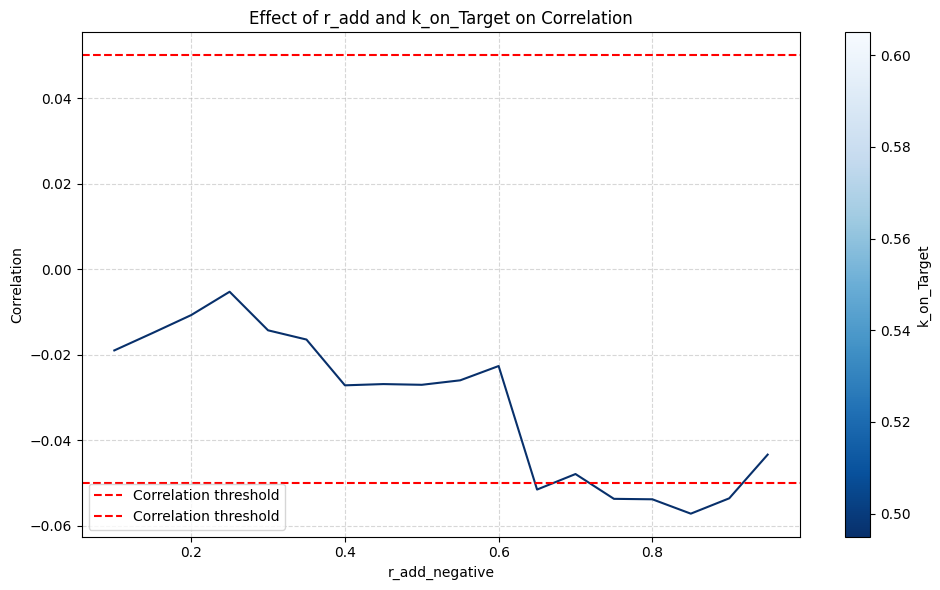

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique k_on_Target values
k_on_values = np.sort(df['p_on'].unique())

# Set up colormap
cmap = get_cmap('Blues_r')
norm = Normalize(vmin=k_on_values.min(), vmax=k_on_values.max())

# Plot each line with color from colormap
for k_on in k_on_values:
    subset = df[df['p_on'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    correlations = subset[5].apply(lambda x: x[0])
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], correlations, 
            # label=f'{k_on:.3f}', 
            color=cmap(norm(k_on)))

# Axis labels and title
ax.set_xlabel('r_add_negative')
ax.set_ylabel('Correlation')
ax.set_title('Effect of r_add and k_on_Target on Correlation')
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(0.05, color = "red", label = "Correlation threshold", linestyle = "--")
ax.axhline(-1*0.05, color = "red", label = "Correlation threshold", linestyle = "--")
# ax.set_xscale('log')
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='k_on_Target')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_915399/647149204.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Blues_r')
/tmp/ipykernel_915399/647149204.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


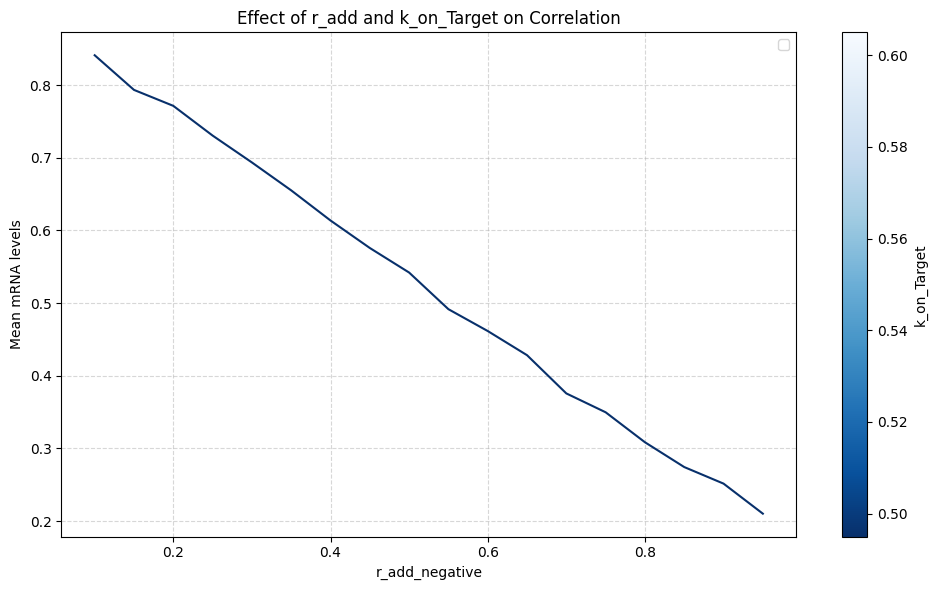

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted unique k_on_Target values
k_on_values = np.sort(df['p_on'].unique())

# Set up colormap
cmap = get_cmap('Blues_r')
norm = Normalize(vmin=k_on_values.min(), vmax=k_on_values.max())

# Plot each line with color from colormap
for k_on in k_on_values:
    subset = df[df['p_on'] == k_on].sort_values('p_add_gene_1_to_gene_2')
    mean_t1 = subset['mean_t1']
    
    ax.plot(subset['p_add_gene_1_to_gene_2'], mean_t1, 
            # label=f'{k_on:.3f}', 
            color=cmap(norm(k_on)))

# Axis labels and title
ax.set_xlabel('r_add_negative')
ax.set_ylabel('Mean mRNA levels')
ax.set_title('Effect of r_add and k_on_Target on Correlation')
ax.grid(True, linestyle='--', alpha=0.5)
# ax.axhline(0.05, color = "red", label = "Correlation threshold", linestyle = "--")
# ax.axhline(-1*0.05, color = "red", label = "Correlation threshold", linestyle = "--")
# ax.set_xscale('log')
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='k_on_Target')
plt.legend()
plt.tight_layout()
plt.show()
